Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 

### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.


## 21. Beginning Deep Learning - Convolution Networks, PyTorch.ipynb

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.


In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# In the notebooks on Pandas, Matplotlib and Scaling
#   04 - Beginning Pandas <br>
#   05 - Beginning Matplotlib <br>
#   06 - Beginning Data Scaling <br>
# we loaded our dataset such as
df_conn = pd.read_csv(r'df_conn_with_labels.csv', index_col=0)
df_conn

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.000000,0,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296,0
6,8888,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...,...
4430183,9200,0.000051,0,0,1,52,1,40,0
4430184,9200,0.000023,0,0,0,0,1,40,0
4430185,9200,0.000005,0,0,0,0,1,40,0
4430186,9200,0.000005,0,0,0,0,1,40,0


This file represents Zeek (formerly Bro) connection log - conn.log`. 
Zeek is a framework used for Network Security Monitoring. 
This entire series is based on using Zeek's data. 
The majority of the notebooks use the conn.log
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html

In [3]:
# Drop the port column
df_conn = df_conn.drop(columns=['id.resp_p'], inplace=False)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,0.000000,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0
4,0.000000,0,0,0,0,0,0,0
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


In [4]:
# Looking at above, we see a number of records with 0s. 
# These will add no value to our learning process
# Let's find all those records and drop them
# Reference: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_conn = df_conn.drop(df_conn[(df_conn.duration == 0 ) & (df_conn.orig_bytes == 0 ) \
                               & (df_conn.resp_bytes == 0 ) & (df_conn.orig_pkts == 0 )  \
                                & (df_conn.orig_ip_bytes == 0 ) & (df_conn.resp_pkts == 0 ) \
                                    & (df_conn.resp_ip_bytes == 0 )].index)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
7,0.054294,208,977,6,528,6,1297,0
8,0.424980,227,791633,176,9387,174,367737,0
9,0.272567,227,406607,171,9127,71,169939,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


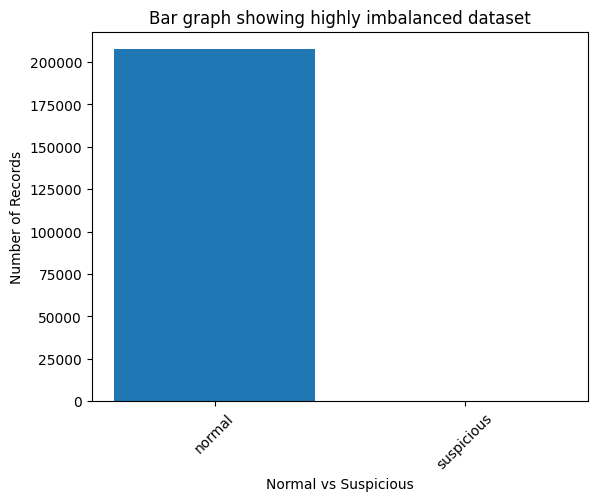

In [5]:
# The graph below shows this dataset is highly imbalanced.
# As a result, using measures like accuracy is more than likely not the best approach, 
# to understand how well our eventual model has "learned"
# via the training data
plt.title('Bar graph showing highly imbalanced dataset')
plt.bar(x=['normal', 'suspicious'], height=[ df_conn[df_conn.label == 0].shape[0], \
                                            df_conn[df_conn.label == 1].shape[0] ])
plt.ylabel(ylabel='Number of Records')
plt.xlabel(xlabel='Normal vs Suspicious')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Getting the percentage of samples that are considered suspicious in this dataset
# This is going to be quite a challenge for this learning algorithm
(df_conn[df_conn.label == 1].shape[0] / df_conn.shape[0]) * 100

0.032272359446649454

In [7]:
# Drop the label column
X_data = df_conn.drop(columns=['label'], inplace=False)
X_data

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,0.053276,208,976,6,528,6,1296
6,0.383646,227,692369,202,10739,117,240893
7,0.054294,208,977,6,528,6,1297
8,0.424980,227,791633,176,9387,174,367737
9,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40
4430184,0.000023,0,0,0,0,1,40
4430185,0.000005,0,0,0,0,1,40
4430186,0.000005,0,0,0,0,1,40


In [8]:
# Extract the labels to be used for classification
y_label = df_conn.label
y_label

5          0
6          0
7          0
8          0
9          0
          ..
4430183    0
4430184    0
4430185    0
4430186    0
4430187    0
Name: label, Length: 207608, dtype: int64

In [9]:
# prepare to split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data.values, y_label, test_size=0.2, train_size=0.8, \
                                                    stratify=y_label, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((166086, 7), (166086,), (41522, 7), (41522,))

In [11]:
# Scaling the data first
# import the scaler library
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Setup the scaler for classification
# We learned abous scaling in noebook
#   06 - Beginning Data Scaling
min_max_scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the classification training data
min_max_scaler.fit(X_train)

# Transform the train data
X_train_scaled = min_max_scaler.transform(X_train)
X_train_scaled, X_train.shape

(array([[2.63072563e-07, 9.18795041e-08, 7.10178687e-08, ...,
         3.59579942e-07, 1.75013957e-06, 3.05765612e-07],
        [3.61672231e-07, 5.89415687e-08, 2.38314996e-08, ...,
         2.75234030e-07, 1.75013957e-06, 1.34744168e-07],
        [2.79225614e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        ...,
        [1.68135854e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        [1.65133428e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        [3.49932746e-07, 7.80108997e-08, 8.38868784e-08, ...,
         3.24065874e-07, 1.75013957e-06, 3.52407824e-07]]),
 (166086, 7))

In [13]:
# Scale the classification test data
X_test_scaled = min_max_scaler.transform(X_test)
X_test_scaled

array([[1.73484676e-05, 3.90054499e-07, 8.33234064e-04, ...,
        7.60578166e-05, 6.94805411e-04, 1.16707452e-03],
       [5.08070521e-07, 6.41422953e-08, 5.29059290e-08, ...,
        2.88551805e-07, 1.75013957e-06, 2.40121018e-07],
       [4.43809598e-06, 2.05948775e-06, 1.84884774e-05, ...,
        9.69534066e-06, 5.60044664e-05, 6.65187043e-05],
       ...,
       [5.47522398e-07, 6.41422953e-08, 8.96064383e-08, ...,
        2.88551805e-07, 1.75013957e-06, 3.73137696e-07],
       [1.83147984e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.95094010e-07, 0.00000000e+00, 0.00000000e+00]])

In [14]:
# import PCA to leverage dimensionality reduction
from sklearn.decomposition import PCA

In [15]:
# Setup PCA to use 3 principal Components
# We learned about PCA in notebook
#   07 - Beginning Principal Component Analysis (PCA)
pca = PCA(n_components=3, random_state=10)
pca

PCA(n_components=3, random_state=10)

In [16]:
# Fit on the X_train
pca.fit(X_train_scaled)

# transform the training data
X_train_pca = pca.transform(X_train_scaled)
X_train_pca

array([[-0.00025828, -0.00023497, -0.00047665],
       [-0.00025839, -0.00023502, -0.00047653],
       [-0.00025846, -0.00023515, -0.00047686],
       ...,
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025826, -0.00023494, -0.00047657]])

In [17]:
# Use the opportunity to PCA transform the X_test classification data
X_test_pca = pca.transform(X_test_scaled)
X_test_pca

array([[ 0.00134937,  0.000691  , -0.0008094 ],
       [-0.00025832, -0.00023494, -0.0004764 ],
       [-0.00018612, -0.00015918, -0.0004979 ],
       ...,
       [-0.00025824, -0.00023488, -0.00047639],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025896, -0.0002359 , -0.00047662]])

In [18]:
# To get this data ready for a Conv1D layer, needs to change the number of dimensions
# Currently the dataset has 2 dimensions
X_train_pca.ndim

2

In [19]:
# We need it to be at least 3 dimensions. 
# Let's reshape to get those 3 dimensions
X_train_pca = [ np.array(i, ndmin=2) for i in X_train_pca ]
X_train_pca = np.asarray(X_train_pca)
#X_train = tf.convert_to_tensor(X_train)

# Make sure the batch size is consistent with the number of labels
# The shape of X_train is batch_size, rows, columns
X_train_pca.shape, y_train.shape

((166086, 1, 3), (166086,))

In [20]:
# Get a snapshot of the data
X_train_pca[:5]

array([[[-0.00025828, -0.00023497, -0.00047665]],

       [[-0.00025839, -0.00023502, -0.00047653]],

       [[-0.00025846, -0.00023515, -0.00047686]],

       [[-0.00025108, -0.00022268, -0.00047436]],

       [[-0.00025899, -0.00023594, -0.00047661]]])

In [21]:
# We need to make the test data at least 3 dimensions, just as we did with the training data. 
# Let's reshape to get those 3 dimensions
X_test_pca = [ np.array(i, ndmin=2) for i in X_test_pca ]
X_test_pca = np.asarray(X_test_pca)

# Make sure the batch size is consistent with the number of labels
X_test_pca.shape, y_test.shape

((41522, 1, 3), (41522,))

In [22]:
# Import PyTorch
import torch

In [23]:
# Before building this 1D convolution model, let's get an understanding of what 1D convolution is
# Define an array
#x_tmp = np.array([1,2,3,4,5,6,7,8,9], ndmin=3, dtype=float)
x_tmp = torch.tensor(data=[[[1,2,3,4,5]]], dtype=torch.float32)
x_tmp, x_tmp.shape

(tensor([[[1., 2., 3., 4., 5.]]]), torch.Size([1, 1, 5]))

In [24]:
# Define a 1D convolution
#   https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html
# Ensure at initialization, the values are the same every time
#   https://pytorch.org/docs/stable/notes/randomness.html
torch.manual_seed(10)

# Build a convolution layer with no padding, hence "valid"
conv_layer = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=(5,), stride=1, padding='valid', bias=False) 
conv_layer

Conv1d(1, 1, kernel_size=(5,), stride=(1,), padding=valid, bias=False)

In [25]:
# Get the initial value for the filter
# We see 1x5 for the kernel size
conv_layer.state_dict()

OrderedDict([('weight',
              tensor([[[-0.0375, -0.0153, -0.1677,  0.1029, -0.2559]]]))])

In [26]:
# Apply the convolution to the data
conv_layer(x_tmp)

tensor([[[-1.4390]]], grad_fn=<ConvolutionBackward0>)

In [27]:
# Compute the convolution operation manually by multiplying the input by the kernel and adding the values up
# This value is the same as seen above from conv_output
(1 * -0.0375) + (2 * -0.0153) + (3 * -0.1677) + (4 * 0.1029) + (5 * -0.2559)

-1.4391

In [28]:
# Confirm the number of in-channels and out-channels
conv_layer.in_channels, conv_layer.out_channels 

(1, 1)

In [29]:
# Alternatively for a more simplistic vie
conv_layer.state_dict()['weight'], x_tmp

(tensor([[[-0.0375, -0.0153, -0.1677,  0.1029, -0.2559]]]),
 tensor([[[1., 2., 3., 4., 5.]]]))

In [30]:
# Squeeze both tensors by moving them down to 1 dimension prior to finding the dot product
# Basically reshape them
torch.squeeze(conv_layer.state_dict()['weight']), torch.squeeze(x_tmp)

(tensor([-0.0375, -0.0153, -0.1677,  0.1029, -0.2559]),
 tensor([1., 2., 3., 4., 5.]))

In [31]:
# Now find the dot product of these
# This returns the value that Torch returned
#   https://pytorch.org/docs/stable/generated/torch.dot.html
torch.dot(torch.squeeze(conv_layer.state_dict()['weight']), torch.squeeze(x_tmp))

tensor(-1.4390)

In [32]:
# Along with Conv1d, I also introduce down-sampling via MaxPool1D
# Setup a random tensor of size 1x1x5 tensor 
torch.manual_seed(11)
max_pool1d = torch.randn(size=[1,1,5])
max_pool1d

tensor([[[ 0.7376,  1.9459, -0.6995, -1.3023, -0.5133]]])

In [33]:
# Perform the MaxPool1d down-sampling operation
# As we defined kernel_size=2, MaxPool1d looks at the first two items and select the larger number
# With a slide of 1, we then move to the next 2 and select the larger number
# This pattern is repeated until the end
# Hence the result show below
torch.nn.MaxPool1d(kernel_size=2, stride=1)(max_pool1d)

tensor([[[ 1.9459,  1.9459, -0.6995, -0.5133]]])

In [34]:
# With that understanding in place,
# convert the training and test data to torch tensors
X_train_pca, X_test_pca = torch.tensor(data=X_train_pca, dtype=torch.float32), \
    torch.tensor(data=X_test_pca, dtype=torch.float32)
X_train_pca[:5], X_test_pca[:5]

(tensor([[[-0.0003, -0.0002, -0.0005]],
 
         [[-0.0003, -0.0002, -0.0005]],
 
         [[-0.0003, -0.0002, -0.0005]],
 
         [[-0.0003, -0.0002, -0.0005]],
 
         [[-0.0003, -0.0002, -0.0005]]]),
 tensor([[[ 0.0013,  0.0007, -0.0008]],
 
         [[-0.0003, -0.0002, -0.0005]],
 
         [[-0.0002, -0.0002, -0.0005]],
 
         [[-0.0003, -0.0002, -0.0005]],
 
         [[-0.0003, -0.0002, -0.0005]]]))

In [35]:
# Convert the panda series to a numpy array
# Make the array 2 dimensions
# Reshape to have multiple rows and 1 column
y_train = np.array(y_train, ndmin=2, dtype=np.float32).reshape(-1, 1)
y_test = np.array(y_test, ndmin=2, dtype=np.float32).reshape(-1, 1)

# Get 5 samples from each
y_train[:5], y_test[:5]

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32))

In [36]:
# Have to convert the above train and test labels to torch tensor
y_train, y_test = torch.tensor(data=y_train, dtype=torch.float32), \
    torch.tensor(data=y_test, dtype=torch.float32)
y_train[:5], y_test[:5]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [37]:
# Set the manual seed to add predictability
torch.manual_seed(10)

# With the understanding of 1D Convolution and Maxpooling, time to build the network
torch_conv1d_model = torch.nn.Sequential(
        # Setup the convolution layer
        torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=[5,], padding='same'),

        # Add a MaxPool 
        #       https://pytorch.org/docs/stable/generated/torch.nn.MaxPool1d.html
        torch.nn.MaxPool1d(kernel_size=2, stride=1),
        
        # Flatten the dimensions
        # https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten
        torch.nn.Flatten(start_dim=1, end_dim=-1),

        # Setup the final layer with 1 output feature and 2 input features
        torch.nn.Linear(in_features=2, out_features=1),

        # Setup the sigmoid Activation Function on the output layer
        # We looked at Sigmoid in notebook:
        #       10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
        torch.nn.Sigmoid()        
)

In [38]:
# Get the state dictionary
torch_conv1d_model.state_dict()

OrderedDict([('0.weight',
              tensor([[[-0.0375, -0.0153, -0.1677,  0.1029, -0.2559]]])),
             ('0.bias', tensor([-0.0789])),
             ('3.weight', tensor([[0.2741, 0.6637]])),
             ('3.bias', tensor([0.1666]))])

In [39]:
# Prepare to visualize the model
# https://github.com/mert-kurttutan/torchview
from torchview import draw_graph


(dot.exe:28592): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


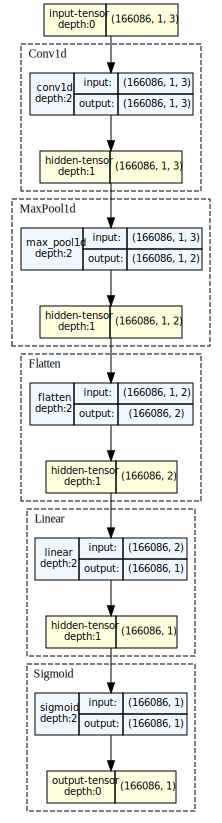

In [40]:
# Plot the model
# https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch
model_graph = draw_graph(model=torch_conv1d_model, input_data=X_train_pca, graph_name='torch_conv1d_model', \
                         expand_nested=True, save_graph=False,show_shapes=True, graph_dir='TB', \
                            roll=True, hide_inner_tensors=False, hide_module_functions=False)
model_graph.visual_graph

In [41]:
# What does the untrained parameters look like
# Well they look just like the information in the state dict above ;-) 
list(torch_conv1d_model.eval().parameters())

[Parameter containing:
 tensor([[[-0.0375, -0.0153, -0.1677,  0.1029, -0.2559]]], requires_grad=True),
 Parameter containing:
 tensor([-0.0789], requires_grad=True),
 Parameter containing:
 tensor([[0.2741, 0.6637]], requires_grad=True),
 Parameter containing:
 tensor([0.1666], requires_grad=True)]

In [42]:
# Make a prediction on the model with untrained parameters
# Basically taking a sneak peek
torch_conv1d_model(X_train_pca)

tensor([[0.5232],
        [0.5232],
        [0.5232],
        ...,
        [0.5232],
        [0.5232],
        [0.5232]], grad_fn=<SigmoidBackward0>)

In [43]:
# Get a look at the model 
import torchinfo

In [44]:
# Get a summary of the model
torchinfo.summary(model=torch_conv1d_model, depth=5)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv1d: 1-1                            6
├─MaxPool1d: 1-2                         --
├─Flatten: 1-3                           --
├─Linear: 1-4                            3
├─Sigmoid: 1-5                           --
Total params: 9
Trainable params: 9
Non-trainable params: 0

In [45]:
# Build a training loop now that our model is defined.
# Reusing the function created in the PyTorch classification
#   17. Beginning Deep Learning, - Classification, Pytorch

# In the following notebooks ...
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
# the training was all done outside of a function. Rather than rewriting the same code all the time
# time to create a function

def torch_training(model=None, epochs=10, learning_rate=0.01, x_train=X_train_pca, \
                   y_train=y_train, x_test=X_test_pca, y_test=y_test):
    ''' Performs training of the model '''
    # Create to lists to save the training and test loss respectively 
    training_loss, validation_loss = [], []

    # Setup the loss function
    clf_loss_fn = torch.nn.BCELoss()

    # Setup the optimizer
    clf_optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        # Clear the gradients
        clf_optimizer.zero_grad()

        # Train the model
        model.train()

        # Make predictions on the training data
        train_preds = model(x_train)
    
        # Get the loss
        train_loss = clf_loss_fn(train_preds, y_train)
        training_loss.append(train_loss)

        # Calculate the gradients
        train_loss.backward()

        # Upgrade the gradients
        clf_optimizer.step()

        # Evaluate the model at the same time
        model.eval()
        with torch.inference_mode():
            val_preds = model(x_test)

            # Calculate the loss on the validation data
            val_loss = clf_loss_fn(val_preds, y_test)
            validation_loss.append(val_loss)

        if epoch %50 == 0:
            print(f'Epoch: {epoch} \t training loss: {train_loss} \t validation loss {val_loss}')
    
    return model, training_loss, validation_loss

In [46]:
# Train the model and get the train and validation loss
(model, train_loss, val_loss) = torch_training(model=torch_conv1d_model, epochs=300, learning_rate=0.01)

Epoch: 0 	 training loss: 0.740565299987793 	 validation loss 0.7295573949813843
Epoch: 50 	 training loss: 0.21152958273887634 	 validation loss 0.20451107621192932
Epoch: 100 	 training loss: 0.04799933359026909 	 validation loss 0.04687802866101265
Epoch: 150 	 training loss: 0.020377807319164276 	 validation loss 0.020021824166178703
Epoch: 200 	 training loss: 0.012035112828016281 	 validation loss 0.011794541962444782
Epoch: 250 	 training loss: 0.008398829959332943 	 validation loss 0.008182840421795845


In [47]:
# Get the model Learned parameters - Weights and Bias
model.state_dict()

OrderedDict([('0.weight',
              tensor([[[0.4878, 0.7301, 0.9895, 0.7300, 0.6173]]])),
             ('0.bias', tensor([-1.2370])),
             ('3.weight', tensor([[1.7006, 2.0902]])),
             ('3.bias', tensor([-0.6399]))])

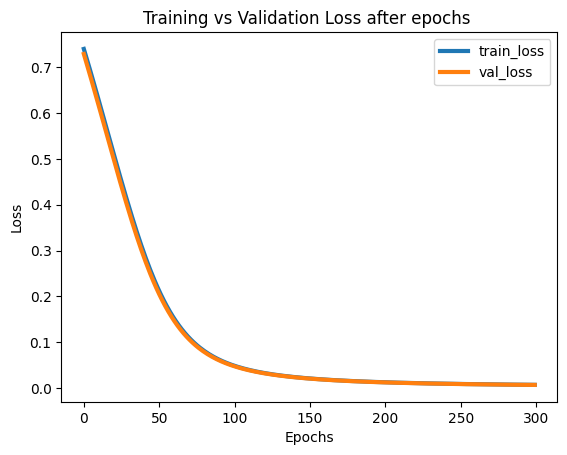

In [48]:
# Plotting the training loss values
plt.title(f'Training vs Validation Loss after epochs ')

# Trying to plot on the "training_loss" by itself will not work
# Matplotlib will more than likely throw an error
# Hence we needed to do "torch.tensor(training_loss).detach()"
plt.plot(torch.tensor(train_loss).detach(), lw=3, label='train_loss')
plt.plot(torch.tensor(val_loss).detach(), lw=3, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
# That's a nice looking graph above there
# Create a sample x for prediction
new_sample = torch.tensor(data=np.array(pca.transform( \
    min_max_scaler.transform(np.array([7110, 1124942, 16527, 1873, 1251154, 1695, 112731], \
                                                                      ndmin=2))), ndmin=3), dtype=torch.float32)
new_sample

tensor([[[0.0140, 0.0644, 0.2027]]])

In [50]:
# Make a prediction
# If the prediction is greater than 0.5 then this sample is suspicious
# Else it is normal
with torch.inference_mode():
    sample_pred = torch_conv1d_model(new_sample)
sample_pred

tensor([[0.0119]])

In [51]:
# Make predictions on the test data
with torch.inference_mode():
    predictions = torch_conv1d_model(X_test_pca)
predictions

tensor([[0.0048],
        [0.0048],
        [0.0048],
        ...,
        [0.0048],
        [0.0048],
        [0.0048]])

In [52]:
# Get the shape of the predictions
predictions.shape, y_test.shape

(torch.Size([41522, 1]), torch.Size([41522, 1]))

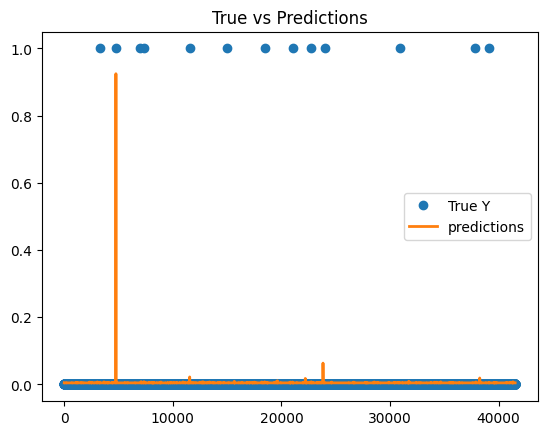

In [53]:
# Model looks terrible. 
plt.title('True vs Predictions')
plt.plot(y_test, linestyle='', marker='o', label='True Y')
plt.plot(predictions, ls='-', lw=2, label='predictions')
plt.legend(loc='best')


In [54]:
# Above confirms the model is terrible
# import some metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
# Grabbing the accuracy score
# Note, we cannot just get the predictions as this would produce continuous values
# Imagine the model is reporting 99% accuracy. 
# Accuracy is misleading here
accuracy_score(y_true=y_test, y_pred=np.round(predictions))

0.9997109965801262

In [56]:
# Print classification report
print(classification_report(y_true=y_test, y_pred=np.round(predictions)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41509
         1.0       1.00      0.08      0.14        13

    accuracy                           1.00     41522
   macro avg       1.00      0.54      0.57     41522
weighted avg       1.00      1.00      1.00     41522



In [57]:
# import seaborn
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns

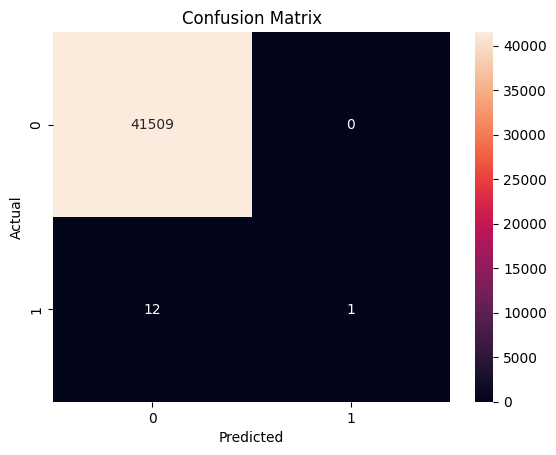

In [58]:
# Looking at the confusion matrix
# To learn more about these metrics see notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=np.round(predictions)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
# Model needs work

In [60]:
# Prepare to save the model
import os

In [61]:
# Create the path
PATH = './SAVED_MODELS/TORCH_CONV_1D/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [62]:
# Save the model weights
torch.save(obj=model, f=F'{PATH}/torch_conv1d_model.pth')

In [63]:
loaded_conv1d_torch_model = torch.load(f=f'{PATH}/torch_conv1d_model.pth')
loaded_conv1d_torch_model

Sequential(
  (0): Conv1d(1, 1, kernel_size=(5,), stride=(1,), padding=same)
  (1): MaxPool1d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (2): Flatten(start_dim=1, end_dim=-1)
  (3): Linear(in_features=2, out_features=1, bias=True)
  (4): Sigmoid()
)

In [64]:
# Make a prediction on the loaded model
loaded_conv1d_torch_model(new_sample)

tensor([[0.0119]], grad_fn=<SigmoidBackward0>)

In [65]:
# Before attempting to take advantage of conv2d layer, we need to reshape our data.
# Keep in mind our data currently is a 1d vector
X_train[0]

array([8.762e-03, 5.300e+01, 1.490e+02, 1.000e+00, 8.100e+01, 1.000e+00,
       1.770e+02])

In [66]:
# The shape is 1x3
# 1 row and 3 columns
X_train[0].shape

(7,)

In [67]:
# For this convolution we need to reshape this data again
# In the 1d convolution, I used 3 features
# Setting up a new PCA this time with 4 dimensions
# So that I can make each sample a square 2x2 matrix
X_data = df_conn.drop(columns=['label'], inplace=False)
X_data

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,0.053276,208,976,6,528,6,1296
6,0.383646,227,692369,202,10739,117,240893
7,0.054294,208,977,6,528,6,1297
8,0.424980,227,791633,176,9387,174,367737
9,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40
4430184,0.000023,0,0,0,0,1,40
4430185,0.000005,0,0,0,0,1,40
4430186,0.000005,0,0,0,0,1,40


In [68]:
# Get the labels (again. Did not need to, but ...)
y_label = df_conn.label
y_label

5          0
6          0
7          0
8          0
9          0
          ..
4430183    0
4430184    0
4430185    0
4430186    0
4430187    0
Name: label, Length: 207608, dtype: int64

In [69]:
# Split the data into train and test
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data.values, y_label, test_size=0.2, \
                                                    train_size=0.8, stratify=y_label, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((166086, 7), (166086,), (41522, 7), (41522,))

In [70]:
# Setup the scaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the training data
min_max_scaler.fit(X_train)

# Transform the data
X_train_scaled = min_max_scaler.transform(X_train)

# Transform the test data
X_test_scaled = min_max_scaler.transform(X_test)

In [71]:
# Setup PCA with 4 principal components
pca = PCA(n_components=4)

# Fit on the scaled data
pca.fit(X_train_scaled)

# Transform the scaled data
X_train_pca = pca.transform(X_train_scaled)
X_train_pca

array([[-2.58281486e-04, -2.34968361e-04, -4.76652709e-04,
         3.60448930e-05],
       [-2.58390230e-04, -2.35020471e-04, -4.76526754e-04,
         3.60380283e-05],
       [-2.58464066e-04, -2.35151244e-04, -4.76858412e-04,
         3.59983123e-05],
       ...,
       [-2.58464121e-04, -2.35151552e-04, -4.76859477e-04,
         3.59983308e-05],
       [-2.58464122e-04, -2.35151561e-04, -4.76859506e-04,
         3.59983313e-05],
       [-2.58257388e-04, -2.34936547e-04, -4.76574090e-04,
         3.60015654e-05]])

In [72]:
# Extracting 1 sample, we see it is shaped 1,4
X_train_pca[0], X_train_pca[0].shape

(array([-2.58281486e-04, -2.34968361e-04, -4.76652709e-04,  3.60448930e-05]),
 (4,))

In [73]:
# Let's reshape this to 2x2
X_train_pca[0].reshape(1, 1, 2, 2), X_train_pca[0].reshape(1, 1, 2, 2).shape

(array([[[[-2.58281486e-04, -2.34968361e-04],
          [-4.76652709e-04,  3.60448930e-05]]]]),
 (1, 1, 2, 2))

In [74]:
# With he understanding of what is needed to reshape the data, time to do the same for all samples
# We need to make the test data at least 3 dimensions, just as we did with the training data. 
# Let's reshape to get those 3 dimensions
X_train_pca = [ np.array(i, ndmin=3).reshape(1,2,2) for i in X_train_pca ]
X_train_pca = np.asarray(X_train_pca)

# Make sure the batch size is consistent with the number of labels
X_train_pca[:2], X_train_pca.shape, y_train[:2], y_train.shape

(array([[[[-2.58281486e-04, -2.34968361e-04],
          [-4.76652709e-04,  3.60448930e-05]]],
 
 
        [[[-2.58390230e-04, -2.35020471e-04],
          [-4.76526754e-04,  3.60380283e-05]]]]),
 (166086, 1, 2, 2),
 2388632    0
 4233049    0
 Name: label, dtype: int64,
 (166086,))

In [75]:
# With the data reshaped, taking a look at one sample
X_train_pca[0]

array([[[-2.58281486e-04, -2.34968361e-04],
        [-4.76652709e-04,  3.60448930e-05]]])

In [76]:
# Transform the test data to 4 principal components
X_test_pca = pca.transform(X_test_scaled)
X_test_pca[0]

array([ 0.00134937,  0.000691  , -0.0008094 , -0.00031127])

In [77]:
# With he understanding of what is needed to reshape the data, time to do the same for all samples
# We need to make the test data at least 3 dimensions, just as we did with the training data. 
# Let's reshape to get those 3 dimensions
X_test_pca = [ np.array(i, ndmin=3).reshape(1,2,2) for i in X_test_pca ]
X_test_pca = np.asarray(X_test_pca)

# Make sure the batch size is consistent with the number of labels
X_test_pca.shape, y_test.shape

((41522, 1, 2, 2), (41522,))

In [78]:
# Before building our model, let's see how conv2d works
# Set the manual seed
torch.manual_seed(12)
# Setup a torch tensor
conv2d_sample = torch.randn(size=(1,1,3,3))
conv2d_sample

tensor([[[[-0.2138, -1.3780, -0.0546],
          [ 0.4515,  0.7858, -1.0884],
          [-0.5599, -0.9336,  0.0479]]]])

In [79]:
# Run the conv2d against our sample
#   https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
# Set the manual seed
torch.manual_seed(12)
conv2d_layer = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, padding='valid', bias=False)
conv2d_layer

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1), padding=valid, bias=False)

In [80]:
# Get our model parameters
# We see a 2x2 filter
conv2d_layer.state_dict()

OrderedDict([('weight',
              tensor([[[[-0.0343, -0.2672],
                        [-0.0473,  0.0871]]]]))])

In [81]:
# Call Conv2d against our data
conv2d_layer(conv2d_sample)

tensor([[[[ 0.4227, -0.0701],
          [-0.2804,  0.3122]]]], grad_fn=<ConvolutionBackward0>)

In [82]:
# How did we get those values? 
# Let's calculate 0.4227 at (conv2d_sample)[0][0][0][0]
# This process is repeated for each item within the 2x2 square
# We then stride to the left by 1 and repeat the process to get all the values
(-0.0343 * -0.2138) + (-0.2672 * -1.3780 ) + (-0.0473 *  0.4515) + (0.0871 * 0.7858)

0.42262216999999996

In [83]:
# Like the Maxpool1d layer above, let's now use MaxPool2D
# Setup the Maxpool1d layer
#   https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
max_pool_2d_layer = torch.nn.MaxPool2d(kernel_size=(2,2), stride=1)
max_pool_2d_layer

MaxPool2d(kernel_size=(2, 2), stride=1, padding=0, dilation=1, ceil_mode=False)

In [84]:
# Apply the down-sampling to our Conv2d output
# What happened here is from the 2x2 results which was returned from the conv2d operation, 
# The largest value within that 2x2 square is shown below as the result of the MaxPool2D operation
max_pool_2d_layer(conv2d_layer(conv2d_sample))

tensor([[[[0.4227]]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

In [85]:
# With that understanding in place,
# convert the training and test data to torch tensors
X_train_pca, X_test_pca = torch.tensor(data=X_train_pca, dtype=torch.float32), \
    torch.tensor(data=X_test_pca, dtype=torch.float32)
X_train_pca[:5], X_test_pca[:5]

(tensor([[[[-2.5828e-04, -2.3497e-04],
           [-4.7665e-04,  3.6045e-05]]],
 
 
         [[[-2.5839e-04, -2.3502e-04],
           [-4.7653e-04,  3.6038e-05]]],
 
 
         [[[-2.5846e-04, -2.3515e-04],
           [-4.7686e-04,  3.5998e-05]]],
 
 
         [[[-2.5108e-04, -2.2268e-04],
           [-4.7436e-04,  3.8733e-05]]],
 
 
         [[[-2.5899e-04, -2.3594e-04],
           [-4.7661e-04,  3.6130e-05]]]]),
 tensor([[[[ 1.3494e-03,  6.9100e-04],
           [-8.0940e-04, -3.1127e-04]]],
 
 
         [[[-2.5832e-04, -2.3494e-04],
           [-4.7640e-04,  3.6010e-05]]],
 
 
         [[[-1.8612e-04, -1.5918e-04],
           [-4.9790e-04,  2.1192e-05]]],
 
 
         [[[-2.5846e-04, -2.3515e-04],
           [-4.7686e-04,  3.5998e-05]]],
 
 
         [[[-2.5846e-04, -2.3515e-04],
           [-4.7686e-04,  3.5998e-05]]]]))

In [86]:
# Convert the panda series to a numpy array
# Make the array 2 dimensions
# Reshape to have multiple rows and 1 column
y_train = np.array(y_train.values, ndmin=2, dtype=np.float32).reshape(-1, 1)
y_test = np.array(y_test.values, ndmin=2, dtype=np.float32).reshape(-1, 1)

# Get 5 samples from each
y_train[:5], y_test[:5]

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32))

In [87]:
# Have to convert the above train and test labels to torch tensor
y_train, y_test = torch.tensor(data=y_train, dtype=torch.float32), \
    torch.tensor(data=y_test, dtype=torch.float32)
y_train[:5], y_test[:5]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [88]:
# Convert the panda series to a numpy array
# Make the array 2 dimensions
# Reshape to have multiple rows and 1 column
#y_train = np.array(y_train.values, ndmin=2, dtype=np.float32).reshape(-1, 1)
#y_test = np.array(y_test.values, ndmin=2, dtype=np.float32).reshape(-1, 1)

# Get 5 samples from each
#y_train[:5], y_test[:5]

In [89]:
# Set the manual seed to add predictability
torch.manual_seed(10)

# With the understanding of 1D Convolution and Maxpooling, time to build the network
torch_conv2d_model = torch.nn.Sequential(
        # Setup the convolution layer
        torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, padding='same'),

        # Add a MaxPool 
        #       https://pytorch.org/docs/stable/generated/torch.nn.MaxPool1d.html
        torch.nn.MaxPool2d(kernel_size=(2,2), stride=1, padding=0),
        
        # Flatten the dimensions
        # https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten
        torch.nn.Flatten(start_dim=1, end_dim=-1),

        # Setup the final layer with 1 output feature and 2 input features
        torch.nn.Linear(in_features=1, out_features=1),

        # Setup the sigmoid Activation Function on the output layer
        # We looked at Sigmoid in notebook:
        #       10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
        torch.nn.Sigmoid()        
)


In [90]:
# Get the state dictionary for the untrained model parameters
torch_conv2d_model.state_dict()

OrderedDict([('0.weight',
              tensor([[[[-0.0419, -0.0171],
                        [-0.1875,  0.1150]]]])),
             ('0.bias', tensor([-0.2861])),
             ('3.weight', tensor([[-0.1763]])),
             ('3.bias', tensor([0.3876]))])

In [91]:
# What does the untrained parameters look like
# Well they look just like the information in the state dict above ;-) 
list(torch_conv1d_model.eval().parameters())

[Parameter containing:
 tensor([[[0.4878, 0.7301, 0.9895, 0.7300, 0.6173]]], requires_grad=True),
 Parameter containing:
 tensor([-1.2370], requires_grad=True),
 Parameter containing:
 tensor([[1.7006, 2.0902]], requires_grad=True),
 Parameter containing:
 tensor([-0.6399], requires_grad=True)]

In [92]:
# Get a summary of the model
torchinfo.summary(model=torch_conv1d_model, depth=5)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv1d: 1-1                            6
├─MaxPool1d: 1-2                         --
├─Flatten: 1-3                           --
├─Linear: 1-4                            3
├─Sigmoid: 1-5                           --
Total params: 9
Trainable params: 9
Non-trainable params: 0

C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\torch\_tensor.py:1295: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ..\aten\src\ATen\native\Convolution.cpp:1004.)
  ret = func(*args, **kwargs)

(dot.exe:14128): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


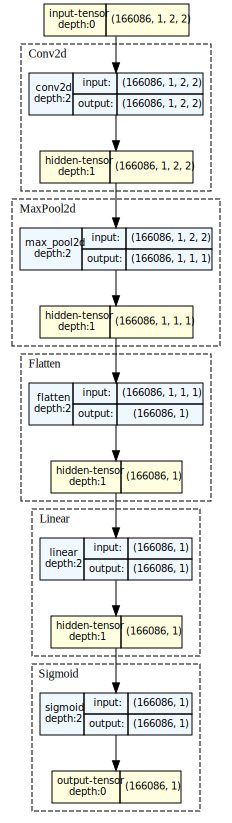

In [93]:
# Plot the model
# https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch
model_graph = draw_graph(model=torch_conv2d_model, input_data=X_train_pca, graph_name='torch_conv2d_model', \
                         expand_nested=True, save_graph=False,show_shapes=True, graph_dir='TB', \
                            roll=True, hide_inner_tensors=False, hide_module_functions=False)
model_graph.visual_graph

In [94]:
# Make a prediction on the model with untrained parameters
# Basically taking a sneak peek
torch_conv2d_model(X_train_pca)

tensor([[0.6078],
        [0.6078],
        [0.6078],
        ...,
        [0.6078],
        [0.6078],
        [0.6078]], grad_fn=<SigmoidBackward0>)

In [95]:
# Build a training loop now that our model is defined.
# Reusing the function created in the PyTorch classification
#   17. Beginning Deep Learning, - Classification, Pytorch

# In the following notebooks ...
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
# the training was all done outside of a function. Rather than rewriting the same code all the time
# time to create a function

def torch_training(model=None, epochs=10, learning_rate=0.01, x_train=X_train_pca, \
                   y_train=y_train, x_test=X_test_pca, y_test=y_test):
    ''' Performs training of the model '''
    # Create to lists to save the training and test loss respectively 
    training_loss, validation_loss = [], []

    # Setup the loss function
    clf_loss_fn = torch.nn.BCELoss()

    # Setup the optimizer
    clf_optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        # Clear the gradients
        clf_optimizer.zero_grad()

        # Train the model
        model.train()

        # Make predictions on the training data
        train_preds = model(x_train)
    
        # Get the loss
        train_loss = clf_loss_fn(train_preds, y_train)
        training_loss.append(train_loss)

        # Calculate the gradients
        train_loss.backward()

        # Upgrade the gradients
        clf_optimizer.step()

        # Evaluate the model at the same time
        model.eval()
        with torch.inference_mode():
            val_preds = model(x_test)

            # Calculate the loss on the validation data
            val_loss = clf_loss_fn(val_preds, y_test)
            validation_loss.append(val_loss)

        if epoch %10 == 0:
            print(f'Epoch: {epoch} \t training loss: {train_loss} \t validation loss {val_loss}')
    
    return model, training_loss, validation_loss

In [96]:
# Train the model and get the train and validation loss
(model, train_loss, val_loss) = torch_training(model=torch_conv2d_model, epochs=300, learning_rate=0.01)

Epoch: 0 	 training loss: 0.9358050227165222 	 validation loss 0.927013099193573
Epoch: 10 	 training loss: 0.8557178378105164 	 validation loss 0.848651647567749
Epoch: 20 	 training loss: 0.7913566827774048 	 validation loss 0.7855542898178101
Epoch: 30 	 training loss: 0.7356809973716736 	 validation loss 0.7302364110946655
Epoch: 40 	 training loss: 0.680101752281189 	 validation loss 0.6743056774139404
Epoch: 50 	 training loss: 0.6187565326690674 	 validation loss 0.6121209263801575
Epoch: 60 	 training loss: 0.5475026369094849 	 validation loss 0.5397645831108093
Epoch: 70 	 training loss: 0.4661031663417816 	 validation loss 0.45756053924560547
Epoch: 80 	 training loss: 0.37990766763687134 	 validation loss 0.3713270425796509
Epoch: 90 	 training loss: 0.2973051369190216 	 validation loss 0.28953197598457336
Epoch: 100 	 training loss: 0.22570103406906128 	 validation loss 0.2192974090576172
Epoch: 110 	 training loss: 0.1688099056482315 	 validation loss 0.16391445696353912
E

In [97]:
# Get the model Learned parameters - Weights and Bias
model.state_dict()

OrderedDict([('0.weight',
              tensor([[[[0.1096, 1.0909],
                        [0.5448, 2.4241]]]])),
             ('0.bias', tensor([-2.0656])),
             ('3.weight', tensor([[1.9048]])),
             ('3.bias', tensor([-0.7806]))])

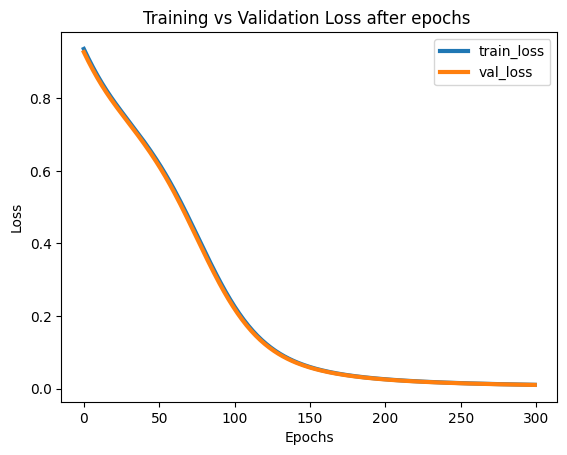

In [98]:
# Plotting the training loss values
plt.title(f'Training vs Validation Loss after epochs ')

# Trying to plot on the "training_loss" by itself will not work
# Matplotlib will more than likely throw an error
# Hence we needed to do "torch.tensor(training_loss).detach()"
plt.plot(torch.tensor(train_loss).detach(), lw=3, label='train_loss')
plt.plot(torch.tensor(val_loss).detach(), lw=3, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [99]:
# What a crazy graph. The validation loss is crazy.
# Well once again, we are here for learning not to model this model in production
# With everything we've learned so far, you can figure out how to make this better

In [100]:
# Create a sample x for prediction
new_sample = torch.tensor(data=np.array(pca.transform(min_max_scaler.transform(\
    np.array([7110, 1124942, 16527, 1873, 1251154, 1695, 112731], ndmin=2))), ndmin=3), dtype=torch.float32)
new_sample

tensor([[[0.0140, 0.0644, 0.2027, 0.0007]]])

In [101]:
# Remember, the test data has to go through the same preprocessing as the train data
new_sample = new_sample.reshape(1,1,2,2)
new_sample

tensor([[[[0.0140, 0.0644],
          [0.2027, 0.0007]]]])

In [102]:
# Make a prediction
# If the prediction is greater than 0.5 then this sample is suspicious
# Else it is normal
with torch.inference_mode():
    sample_pred = torch_conv2d_model(new_sample)
sample_pred

tensor([[0.0126]])

In [103]:
# Make predictions on the test data
with torch.inference_mode():
    predictions = torch_conv2d_model(X_test_pca)
predictions

tensor([[0.0089],
        [0.0089],
        [0.0089],
        ...,
        [0.0089],
        [0.0089],
        [0.0089]])

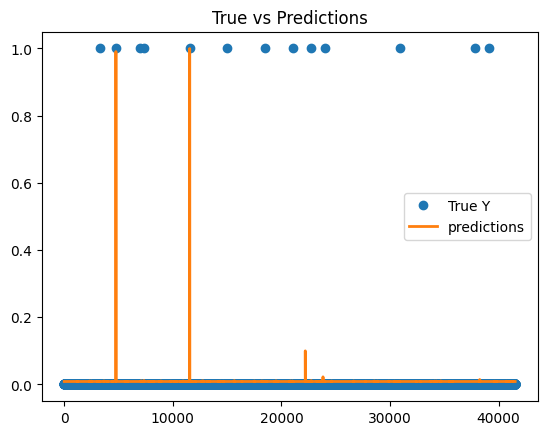

In [104]:
# Above confirms this model is terrible. 
plt.title('True vs Predictions')
plt.plot(y_test, linestyle='', marker='o', label='True Y')
plt.plot(predictions, ls='-', lw=2, label='predictions')
plt.legend(loc='best')

In [105]:
# Grabbing the accuracy score
accuracy_score(y_true=y_test, y_pred=np.round(predictions))

0.999735080198449

In [106]:
# Print classification report
print(classification_report(y_true=y_test, y_pred=np.round(predictions)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41509
         1.0       1.00      0.15      0.27        13

    accuracy                           1.00     41522
   macro avg       1.00      0.58      0.63     41522
weighted avg       1.00      1.00      1.00     41522



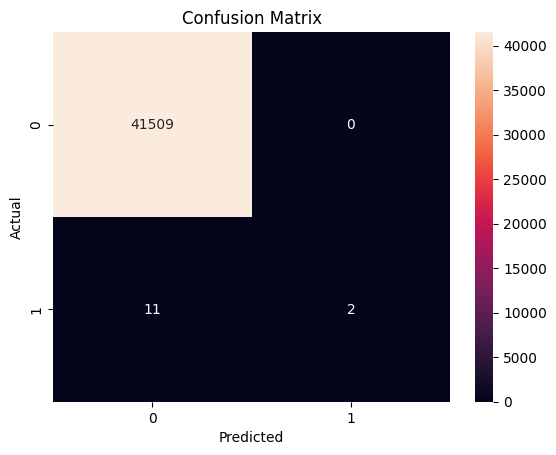

In [107]:
# Looking at the confusion matrix, clearly this model has way too much false positives
# To learn more about metrics, see notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=np.round(predictions)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [108]:
# Create the path
PATH = './SAVED_MODELS/TORCH_CONV_2D/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [109]:
# Save the model weights
torch.save(obj=model, f=F'{PATH}/torch_conv2d_model.pth')

In [110]:
loaded_conv2d_torch_model = torch.load(f=f'{PATH}/torch_conv2d_model.pth')
loaded_conv2d_torch_model

Sequential(
  (0): Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1), padding=same)
  (1): MaxPool2d(kernel_size=(2, 2), stride=1, padding=0, dilation=1, ceil_mode=False)
  (2): Flatten(start_dim=1, end_dim=-1)
  (3): Linear(in_features=1, out_features=1, bias=True)
  (4): Sigmoid()
)

In [111]:
# Make a prediction on the loaded model
loaded_conv2d_torch_model(new_sample)

tensor([[0.0126]], grad_fn=<SigmoidBackward0>)

Additional References and Good reads <br>
https://www.youtube.com/watch?v=WZdxt9xatrY <br>
https://stackoverflow.com/questions/55701788/should-a-1d-cnn-need-padding-to-retain-input-length <br>
https://medium.com/@santi.pdp/how-pytorch-transposed-convs1d-work-a7adac63c4a5 <br>

